In [1]:
from PIL import Image
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
from utils.color_recognition_module import knn_classifier as knn_classifier

dataset_path = "color_dataset"

### Loading the Dataset

In [2]:
X, y = [], []
classes = []

for i, cls in enumerate(os.listdir(dataset_path)):
    classes.append(cls)
    
    class_path = os.path.join(dataset_path, cls)    
    for image in os.listdir(class_path):
        image = cv2.imread(os.path.join(class_path, image))
        
        # convert to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        image = cv2.resize(image, (32, 32))
        X.append(image)
        y.append(i)

X, y = np.array(X), np.array(y)
print(classes)
print(X.shape, y.shape)

['black', 'blue', 'green', 'orange', 'red', 'white', 'yellow']
(1627, 32, 32, 3) (1627,)


### Visualizing the Dataset

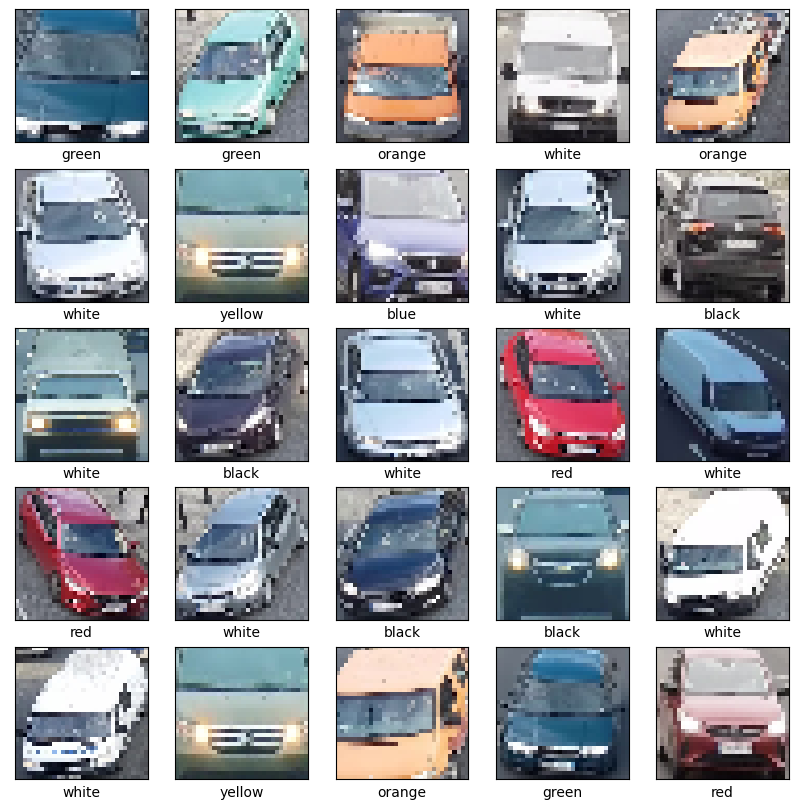

In [3]:
import random

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    index = random.randint(0, len(X))
    
    plt.imshow(X[index])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classes[y[index]])
plt.show()

### Splitting the Dataset into Train/Test Sets

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1464, 32, 32, 3) (1464,)
(163, 32, 32, 3) (163,)


### Building Keras Model

In [7]:
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers
import tensorflow as tf
from tensorflow_addons.layers import WeightNormalization
from tensorflow.keras import metrics

# creating model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(len(classes)))

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 32)         

### Compiling and Training the Model

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    X_train, 
    y_train, 
    epochs=99, 
    validation_data=(X_test, y_test),
    shuffle=True
)

Train on 1464 samples, validate on 163 samples
Epoch 1/99
1464/1464 [==============================] - 3s 2ms/sample - loss: 9.5626 - accuracy: 0.2090 - val_loss: 1.8079 - val_accuracy: 0.3067
Epoch 2/99
1464/1464 [==============================] - 0s 79us/sample - loss: 1.9689 - accuracy: 0.2507 - val_loss: 1.6922 - val_accuracy: 0.3742
Epoch 3/99
1464/1464 [==============================] - 0s 81us/sample - loss: 1.6047 - accuracy: 0.3818 - val_loss: 1.4429 - val_accuracy: 0.5215
Epoch 4/99
1464/1464 [==============================] - 0s 80us/sample - loss: 1.3362 - accuracy: 0.5143 - val_loss: 1.0795 - val_accuracy: 0.6196
Epoch 5/99
1464/1464 [==============================] - 0s 71us/sample - loss: 1.0853 - accuracy: 0.6168 - val_loss: 0.9373 - val_accuracy: 0.6933
Epoch 6/99
1464/1464 [==============================] - 0s 82us/sample - loss: 0.9102 - accuracy: 0.6824 - val_loss: 0.7927 - val_accuracy: 0.7362
Epoch 7/99
1464/1464 [==============================] - 0s 69us/sample -

1464/1464 [==============================] - 0s 93us/sample - loss: 0.0919 - accuracy: 0.9638 - val_loss: 0.2028 - val_accuracy: 0.9202
Epoch 57/99
1464/1464 [==============================] - 0s 94us/sample - loss: 0.0842 - accuracy: 0.9747 - val_loss: 0.2135 - val_accuracy: 0.9080
Epoch 58/99
1464/1464 [==============================] - 0s 95us/sample - loss: 0.0966 - accuracy: 0.9727 - val_loss: 0.1815 - val_accuracy: 0.9202
Epoch 59/99
1464/1464 [==============================] - 0s 95us/sample - loss: 0.1070 - accuracy: 0.9686 - val_loss: 0.2307 - val_accuracy: 0.9202
Epoch 60/99
1464/1464 [==============================] - 0s 95us/sample - loss: 0.1456 - accuracy: 0.9454 - val_loss: 0.2037 - val_accuracy: 0.9202
Epoch 61/99
1464/1464 [==============================] - 0s 93us/sample - loss: 0.0781 - accuracy: 0.9734 - val_loss: 0.1506 - val_accuracy: 0.9325
Epoch 62/99
1464/1464 [==============================] - 0s 95us/sample - loss: 0.0741 - accuracy: 0.9734 - val_loss: 0.2088

### Evaluating the Model on the Test Set

163/163 - 0s - loss: 0.3491 - accuracy: 0.8957


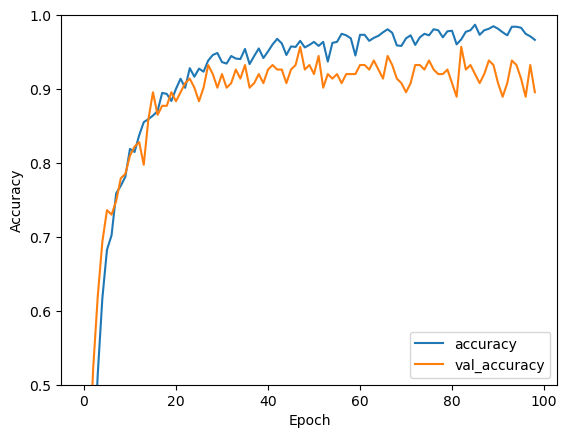

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
plt.show()

### Saving and Loading the Model

In [11]:
# save model
model.save('weights/color.h5')

163/163 - 0s - loss: 0.3491 - accuracy: 0.8957


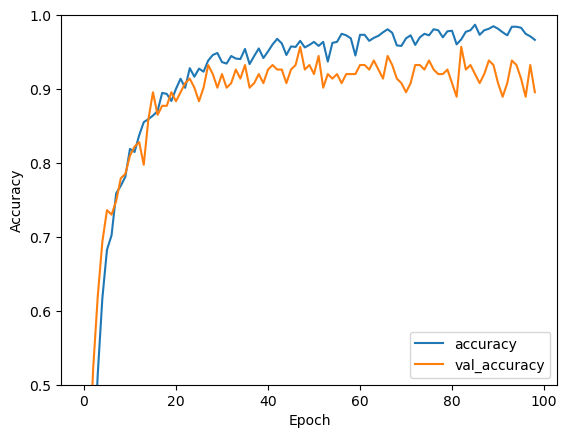

In [12]:
from tensorflow.keras.models import load_model

mode_loaded = load_model('weights/color.h5')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = mode_loaded.evaluate(X_test,  y_test, verbose=2)
plt.show()